## This notebook is dedicated to some EDA based on our business questions:

    - Does the airline have an impact on number of flights?
    - Do the airports (origin and destination) affect the amount of flights?
    - What is the impact of the day of the week on the amount of flights?


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### We started by importing the necessary libraries and will now get the clean data

In [2]:
clean=pd.read_csv('../Data/clean/cleaned_airlines.csv')

In [3]:
clean

,airline,flight,airport_from,airport_to,day_of_week,departure_time,flight_length,delay
0,CO,269,SFO,IAH,3,00:15:00,205,1
1,US,1558,PHX,CLT,3,00:15:00,222,1
2,AA,2400,LAX,DFW,3,00:20:00,165,1
3,AA,2466,SFO,DFW,3,00:20:00,195,1
4,AS,108,ANC,SEA,3,00:30:00,202,0
...,...,...,...,...,...,...,...,...
539378,CO,178,OGG,SNA,5,23:59:00,326,0
539379,FL,398,SEA,ATL,5,23:59:00,305,0
539380,FL,609,SFO,MKE,5,23:59:00,255,0
539381,UA,78,HNL,SFO,5,23:59:00,313,1


### Let's start by checking the amount of flights per airline and per day of the week

In [4]:
al_plot = clean.groupby(['airline']).agg({'flight':'count'}).reset_index()
week_plot = clean.groupby(['day_of_week']).agg({'flight':'count'}).reset_index()

In [5]:
display(al_plot)
print()
display(week_plot)

,airline,flight
0,9E,20686
1,AA,45656
2,AS,11471
3,B6,18112
4,CO,21118
5,DL,60940
6,EV,27983
7,F9,6456
8,FL,20827
9,HA,5578


,day_of_week,flight
0,1,72769
1,2,71340
2,3,89746
3,4,91445
4,5,85248
5,6,58956
6,7,69879


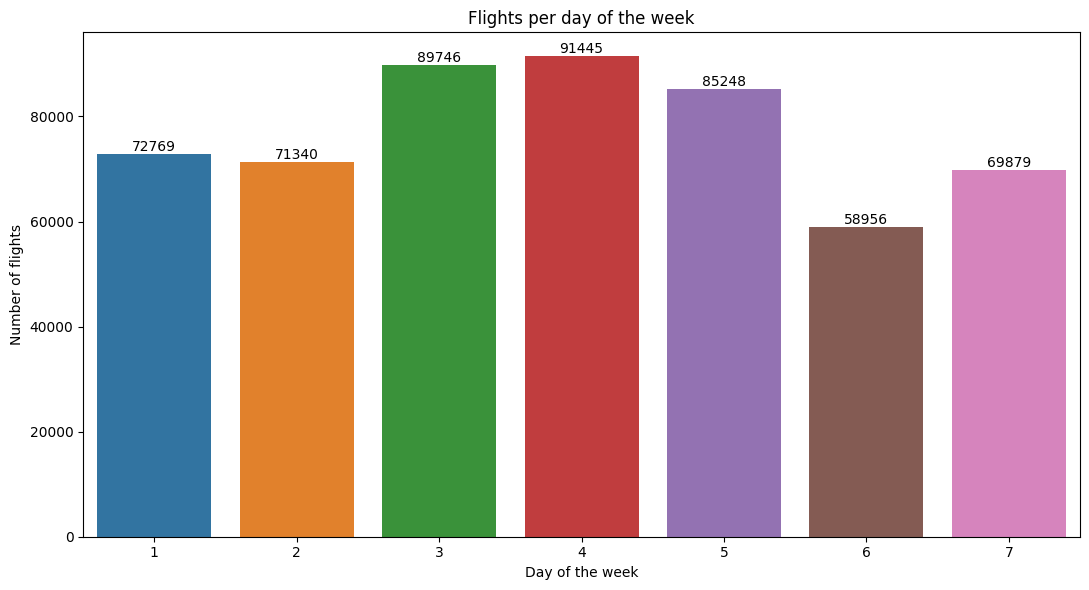

In [6]:
fig,ax = plt.subplots(figsize=(11,6))

wp = sns.barplot(data=week_plot, x='day_of_week', y='flight', palette=sns.color_palette())
wp.bar_label(wp.containers[0], label_type='edge')
wp.set(ylabel='Number of flights', xlabel='Day of the week', title='Flights per day of the week')

plt.tight_layout()
plt.show()

### Not an extreme variance, but surprisingly wednesday and thursday sit at the top, with friday very close behind and saturday at the bottom

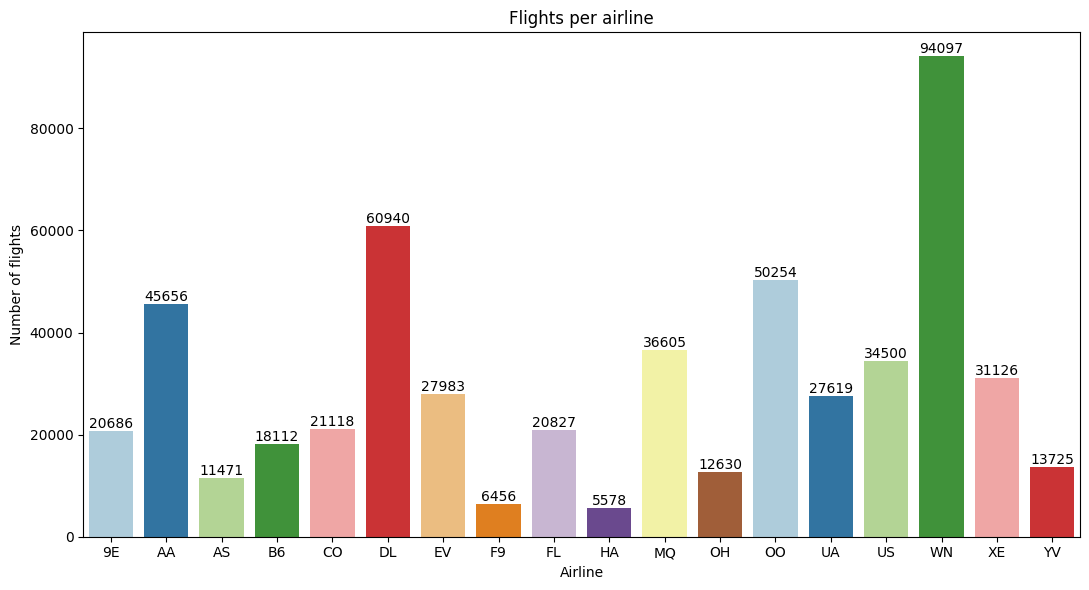

In [7]:
fig,ax = plt.subplots(figsize=(11,6))

ap = sns.barplot(data=al_plot, x='airline', y='flight', palette=sns.color_palette('Paired'))
ap.bar_label(ap.containers[0], label_type='edge')
ap.set(ylabel='Number of flights', xlabel='Airline', title='Flights per airline')

plt.tight_layout()
plt.show()

### On this one we have a very clear spike with WN (Southwest Airlines), while DL(Delta Air Lines), OO(SkyWest Airlines) and AA(American Airlines) are up next.

In [8]:
air_from = clean.groupby(['airport_from']).agg({'flight':'count'}).reset_index()
air_to = clean.groupby(['airport_to']).agg({'flight':'count'}).reset_index()

In [9]:
display(air_from)
print()
display(air_to)

,airport_from,flight
0,ABE,342
1,ABI,211
2,ABQ,2799
3,ABR,2
4,ABY,87
...,...,...
288,VPS,633
289,WRG,59
290,XNA,1128
291,YAK,57


,airport_to,flight
0,ABE,305
1,ABI,211
2,ABQ,2800
3,ABR,2
4,ABY,87
...,...,...
288,VPS,633
289,WRG,59
290,XNA,1123
291,YAK,57


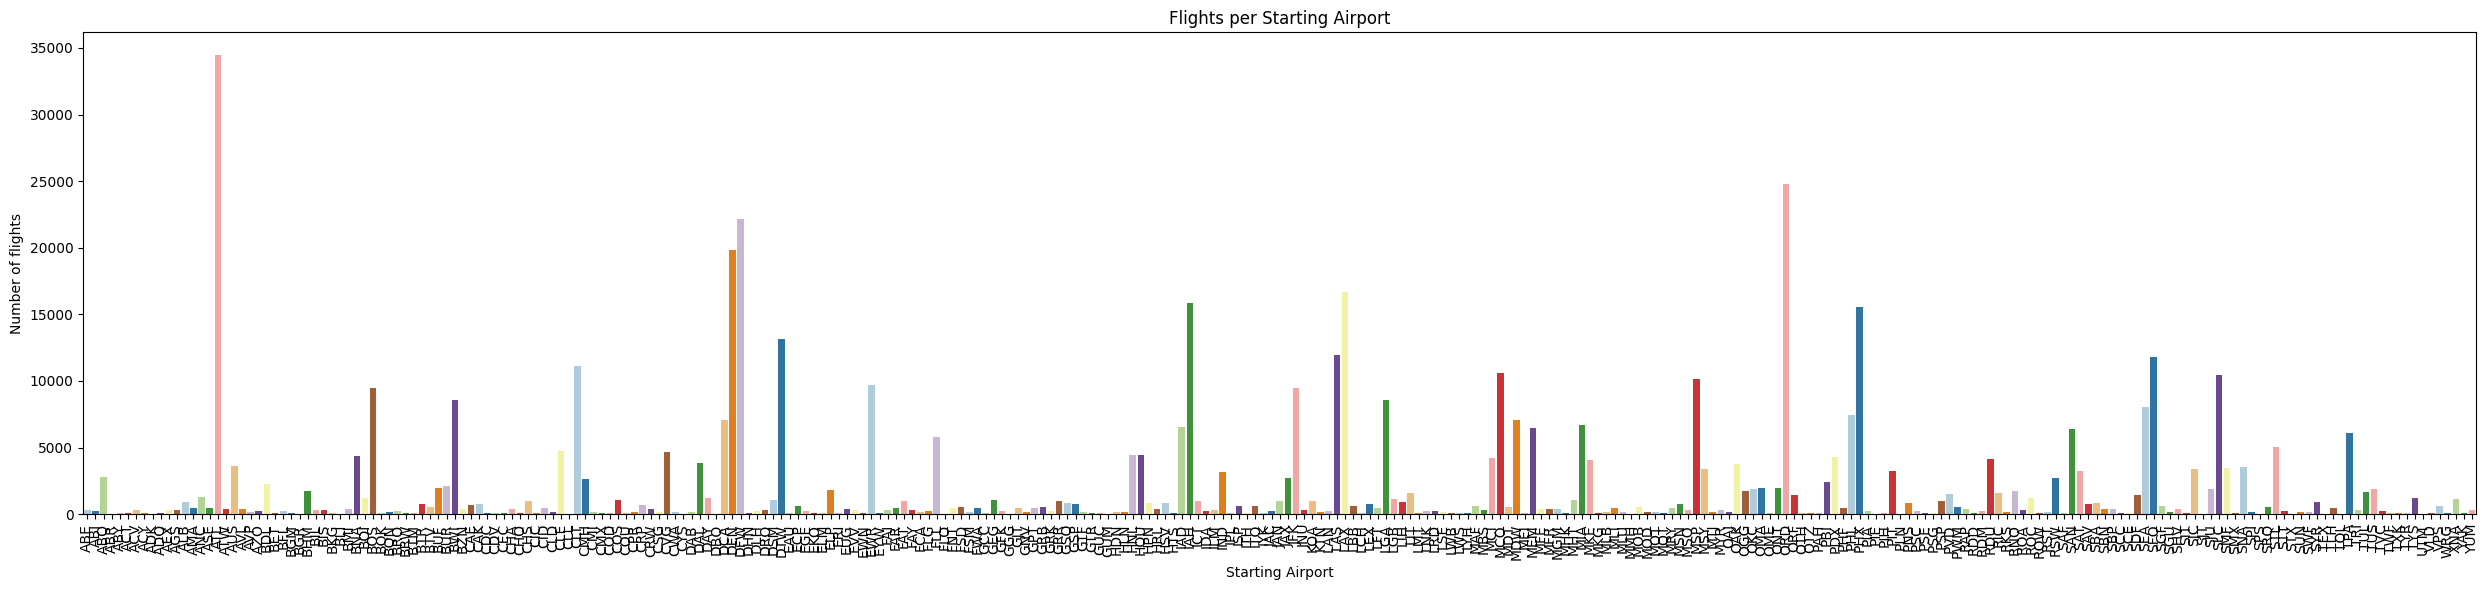

In [10]:
fig,ax = plt.subplots(figsize=(25,6))

af = sns.barplot(data=air_from, x='airport_from', y='flight', palette=sns.color_palette('Paired'))

af.set(ylabel='Number of flights', xlabel='Starting Airport', title='Flights per Starting Airport')
af.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

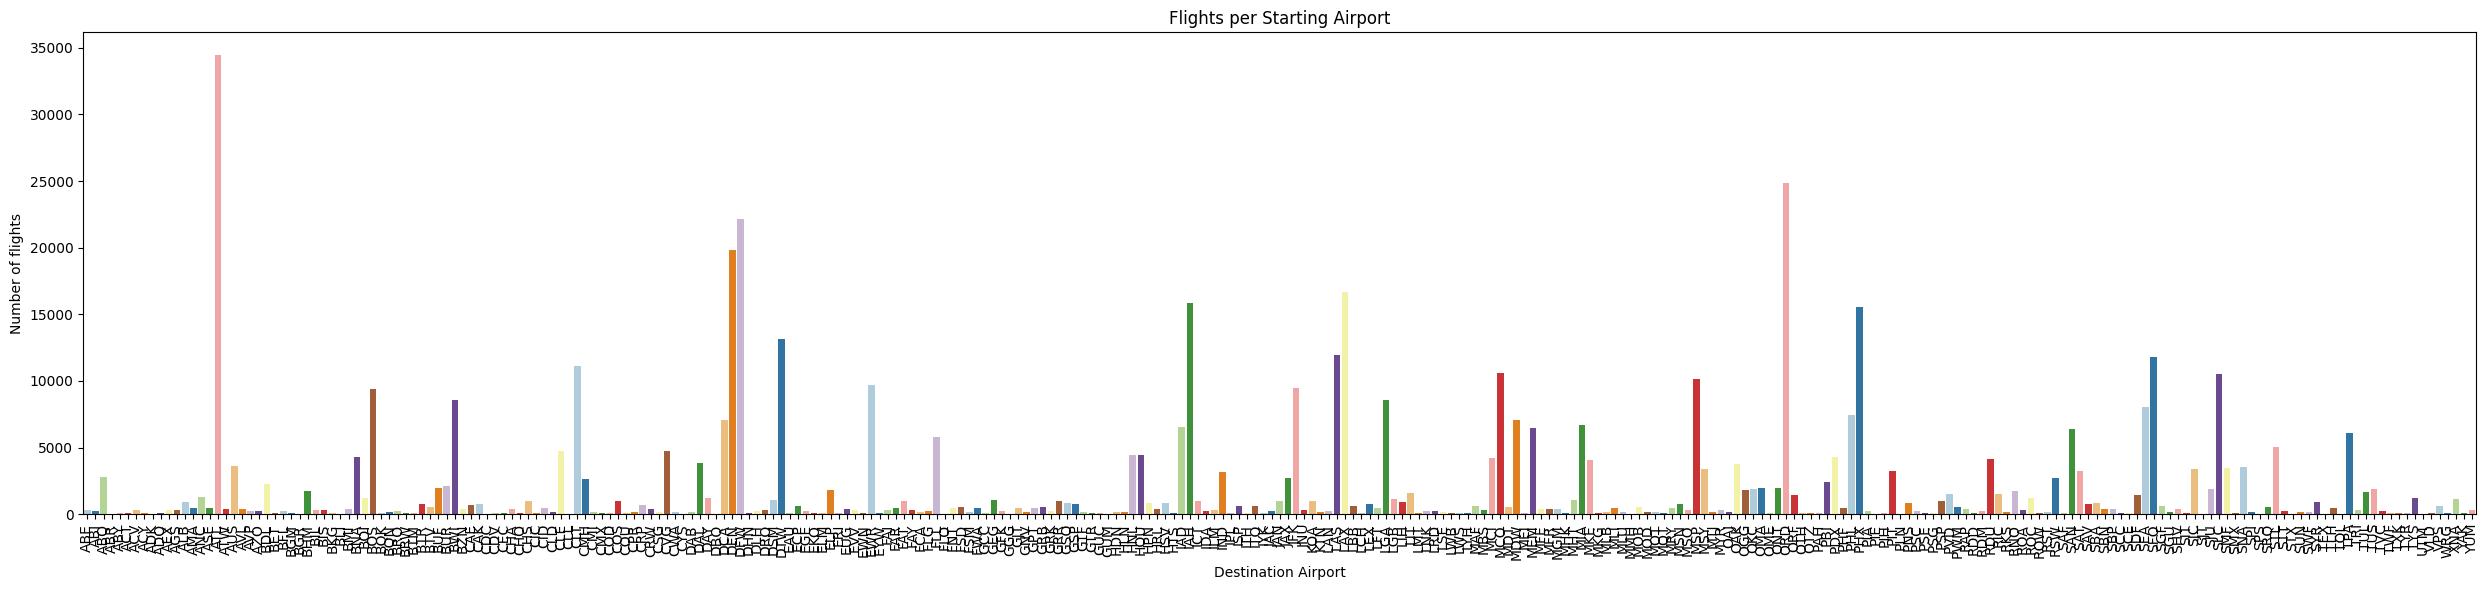

In [11]:
fig,ax = plt.subplots(figsize=(25,6))

at = sns.barplot(data=air_to, x='airport_to', y='flight', palette=sns.color_palette('Paired'))

at.set(ylabel='Number of flights', xlabel='Destination Airport', title='Flights per Starting Airport')
at.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### On these last 2 plots we can clearly see that some airports stand out, but it's incredibily hard to tell which ones